# **EDA of E-commerce Customer Behavior**

Conduct an exploratory data analysis (EDA) on the given E-commerce Customer Behavior. Focus on customer behavior, purchase trends, and satisfaction levels using Python libraries: Pandas, Numpy, Matplotlib, and Seaborn.

## Dataset Overview:

- **CustomerID:** Unique identifier for each customer.
- **Gender:** Gender of the customer.
- **Age:** Age of the customer.
- **City:** City where the customer resides.
- **Membership Type:** Type of customer membership (Gold, Silver, Bronze).
- **Total Spend:** Total amount spent by the customer.
- **Items Purchased:** Number of items purchased.
- **Average Rating:** Average rating given by the customer.
- **Discount Applied:** Whether a discount was applied (True/False).
- **Days Since Last Purchase:** Number of days since the customer’s last purchase.
- **Satisfaction Level:** Customer's satisfaction level (Satisfied, Neutral, Unsatisfied).

## **Task**

### **Data Exploration**

Explore the dataset to get a general understanding of the data.

- Load the dataset using Pandas.
- Print the first 10 rows of the dataset.
- Display Statistical Summary. (show the summary for object data columns separately)
- Get the information, data types of all columns and the shape of the dataset (number of rows and columns).
- Display only Data types

(5 points)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/E-commerce Customer Behavior.csv")

In [12]:
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [11]:
# statistical summary
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [13]:
df.describe(include= "object")

,Gender,City,Membership Type,Satisfaction Level
count,350,350,350,348
unique,2,6,3,3
top,Female,New York,Gold,Satisfied
freq,175,59,117,125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [8]:
df.size

3850

In [15]:
df.dtypes

,0
Customer ID,int64
Gender,object
Age,int64
City,object
Membership Type,object
Total Spend,float64
Items Purchased,int64
Average Rating,float64
Discount Applied,bool
Days Since Last Purchase,int64


In [9]:
df.shape

(350, 11)

### **Handling Missing Values**
Identify and deal with any missing data.

- Check for missing values in the dataset.
- If missing values exist, Show the rows with missing values.
- If missing values exist, Decide whether to fill them (using the mean, median, etc.) or drop them and justify your choice.


(3 Points)

In [16]:
df.isnull().any()

,0
Customer ID,False
Gender,False
Age,False
City,False
Membership Type,False
Total Spend,False
Items Purchased,False
Average Rating,False
Discount Applied,False
Days Since Last Purchase,False


In [17]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [22]:
df[df.isnull().any(axis = 1)]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [24]:
# since we only have 2 rows that have missing values, dropping them won't effect our analysis much
df.dropna(inplace= True)

### **Duplicates**

- Check for duplicate records in the dataset. If duplicates exist, remove them.

(1 Point)

In [27]:
df.duplicated().any()

False

In [28]:
df.duplicated().sum()

0

In [29]:
# we don't have any duplicated records/rows in the dataset

### **Conditional Filtering**
Filter data based on specific conditions.

- How many customers have the Gold membership type?
- Filter and display customers who spent more than $1,000.
- Identify customers from New York who applied a discount.

( 3 points)

In [40]:
df[df["Membership Type"] == "Gold"].shape
# we have 117 rows / customers that have membership type = Gold

(117, 11)

In [42]:
df[df["Total Spend"] > 1000]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,Satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,Satisfied


In [56]:
# nyc = df[df["City"] == "New York"]
# discount_applied = df[df["Discount Applied"] == True ]


df[(df["City"] == "New York") & (df["Discount Applied"] == True )]


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
24,125,Female,31,New York,Gold,1140.6,15,4.6,True,27,Satisfied
30,131,Female,30,New York,Gold,1190.8,16,4.5,True,20,Satisfied
36,137,Female,32,New York,Gold,1160.3,14,4.4,True,22,Satisfied
42,143,Female,31,New York,Gold,1130.6,15,4.5,True,26,Satisfied
48,149,Female,30,New York,Gold,1180.8,16,4.7,True,19,Satisfied
54,155,Female,31,New York,Gold,1140.6,15,4.6,True,27,Satisfied


### **Analysis**


 ( Hint: Group by, conditional filtering, Visualization )

##### Which membership type shows the highest total spending in the dataset?  (2 Points)

In [68]:
df.groupby("Membership Type")["Total Spend"].sum().sort_values(ascending= False)

# Membership Type: Gold has the highest total spending in the dataset


,Total Spend
Membership Type,
Gold,153403.9
Silver,87566.6
Bronze,54061.5


#### How does customer satisfaction impact total spending across different membership types? Which membership type spends more based on satisfaction levels? (2 Points)

In [79]:
df2 = df.pivot_table( values = "Total Spend", index = "Membership Type", columns = "Satisfaction Level", aggfunc = sum)

<ipython-input-79-5f7906e85626>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = df.pivot_table( values = "Total Spend", index = "Membership Type", columns = "Satisfaction Level", aggfunc = sum)


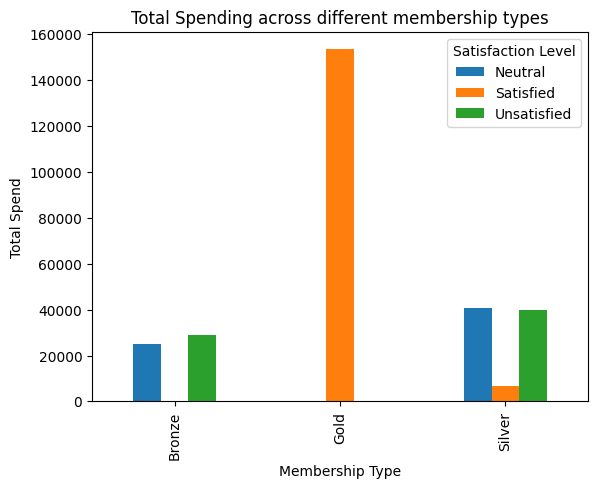

In [110]:
df2.plot(kind = "bar")
plt.title("Total Spending across different membership types")
plt.xlabel("Membership Type")
plt.ylabel("Total Spend")
plt.show()

#### What is the average rating for customers who applied discounts, and does the membership type have any effect on the ratings? (2 points)

In [102]:
df.head(5)
df3 = df[df["Discount Applied"] == True].groupby("Membership Type")["Average Rating"].mean()
df3
# df.groupby(["Membership Type", "Discount Applied"])["Average Rating"].mean()

,Average Rating
Membership Type,
Bronze,3.456897
Gold,4.544068
Silver,3.927586


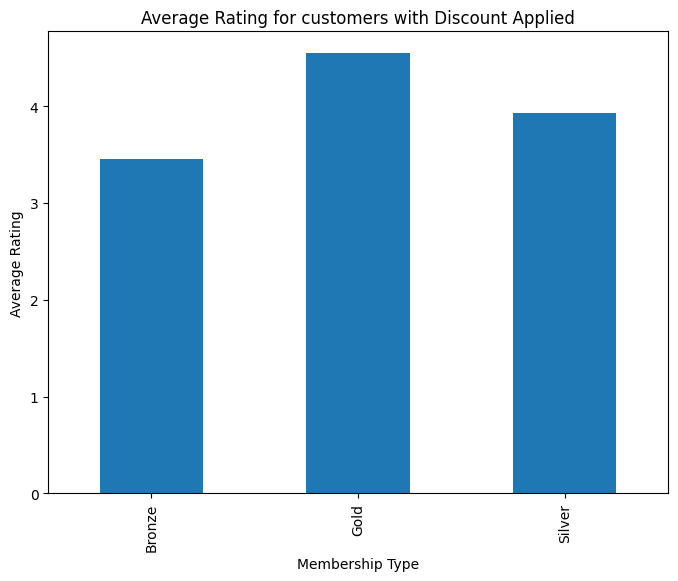

In [108]:
plt.figure(figsize=(8,6))
df3.plot(kind = "bar")
plt.title("Average Rating for customers with Discount Applied")
plt.xlabel("Membership Type")
plt.ylabel("Average Rating")
plt.show()

In [111]:
# gold membership type tends to have the most average rating

#### Analyze the Impact of Days Since Last Purchase on Satisfaction Level (2 Points)

In [112]:
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [118]:
df4 = df.groupby("Days Since Last Purchase")["Satisfaction Level"].value_counts().unstack()
df4

Satisfaction Level,Neutral,Satisfied,Unsatisfied
Days Since Last Purchase,,,
9,NaN,9.0,NaN
10,NaN,17.0,NaN
11,NaN,6.0,NaN
12,6.0,11.0,NaN
13,8.0,12.0,NaN
14,4.0,9.0,NaN
15,9.0,2.0,NaN
16,5.0,NaN,NaN
17,10.0,NaN,NaN


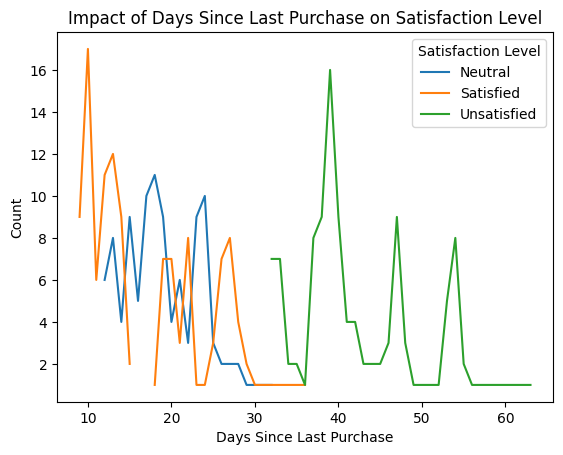

In [124]:
df4.plot(kind= "line")
plt.title("Impact of Days Since Last Purchase on Satisfaction Level")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Count")
plt.show()